In [12]:
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [13]:
df= pd.read_csv('bfi.csv')

In [14]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [16]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [17]:
df.drop(['gender', 'education', 'age'], axis = 1, inplace = True)

In [18]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2800 non-null   int64  
 1   A1          2784 non-null   float64
 2   A2          2773 non-null   float64
 3   A3          2774 non-null   float64
 4   A4          2781 non-null   float64
 5   A5          2784 non-null   float64
 6   C1          2779 non-null   float64
 7   C2          2776 non-null   float64
 8   C3          2780 non-null   float64
 9   C4          2774 non-null   float64
 10  C5          2784 non-null   float64
 11  E1          2777 non-null   float64
 12  E2          2784 non-null   float64
 13  E3          2775 non-null   float64
 14  E4          2791 non-null   float64
 15  E5          2779 non-null   float64
 16  N1          2778 non-null   float64
 17  N2          2779 non-null   float64
 18  N3          2789 non-null   float64
 19  N4          2764 non-null  

In [22]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [23]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [24]:
# Now factor-analysis

In [25]:
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax')

In [26]:
df = df.dropna()

In [28]:
contains_NaN = df.isna().any(axis=None)

In [29]:
contains_NaN

False

In [30]:
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [31]:
loadings = fa.loadings_

In [33]:
#loadings

In [34]:
#Getthe Eigenvector and eigenvalues

In [35]:
ev, v = fa.get_eigenvalues()

In [36]:
xvals = range(1, df.shape[1]+1)

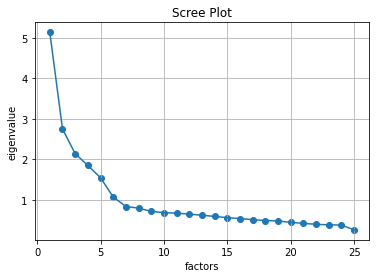

In [39]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

In [41]:
pd.DataFrame.from_records(loadings) #from_records Convert structured or record ndarray to DataFrame.

,0,1,2,3,4,5
0,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
1,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
2,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
3,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
4,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
5,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
6,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
7,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
8,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
9,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423
